In [35]:
#Definición de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [36]:
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [37]:
#Creación del dataframe
datos = pd.read_csv("C:\\Users\\espin\\Downloads\\comprar_alquilar.csv", encoding='latin-1')
datos.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [38]:
#Normalizamos los datos
scaler = StandardScaler()
df = datos.drop(['comprar'], axis=1) 
scaler.fit(df) 
X_scaled=scaler.transform(df)

In [39]:
#Instaciamos objeto PCA y aplicamos
pca=PCA(n_components=9) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled)

print("Porcentaje de varianza por componente", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma', sum(expl[0:5]))

Porcentaje de varianza por componente (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma 0.8524062117714313


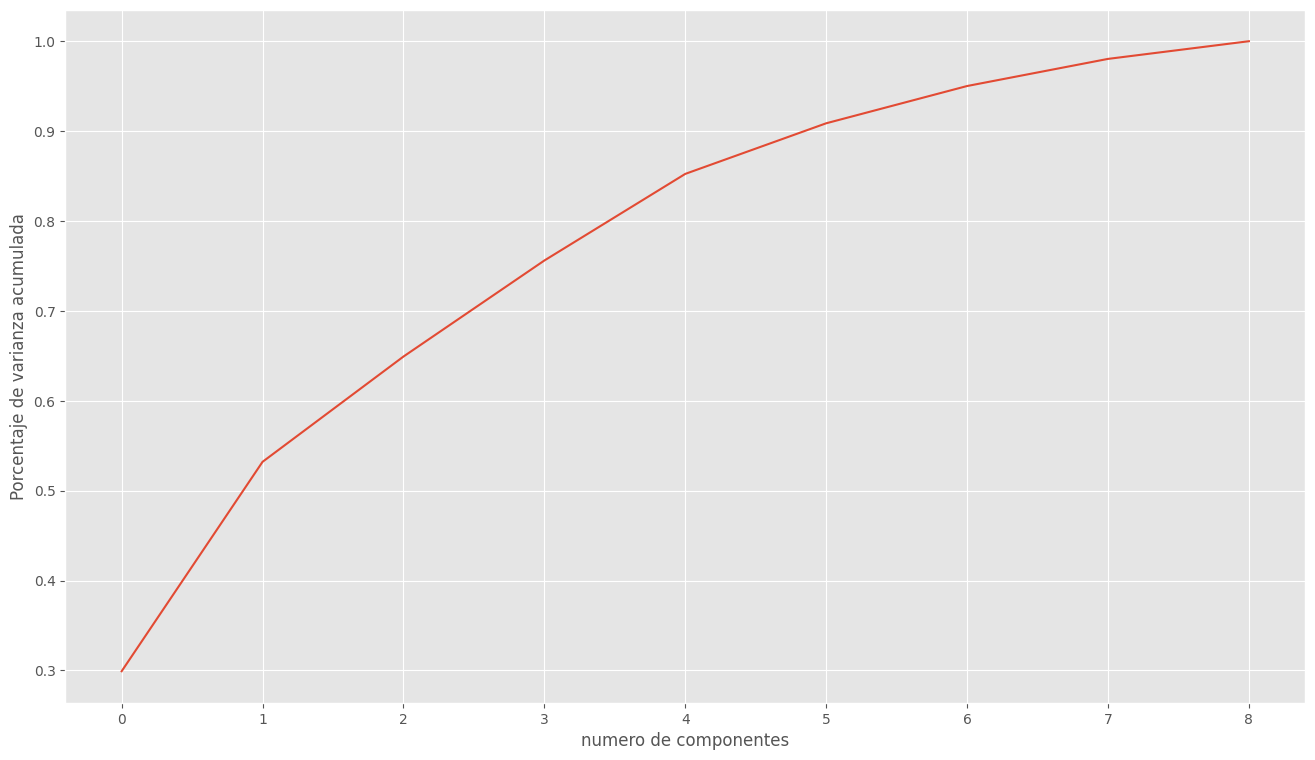

In [41]:
#graficamos eñ acumulado de la varianza acumulada explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('Porcentaje de varianza acumulada')
plt.show()

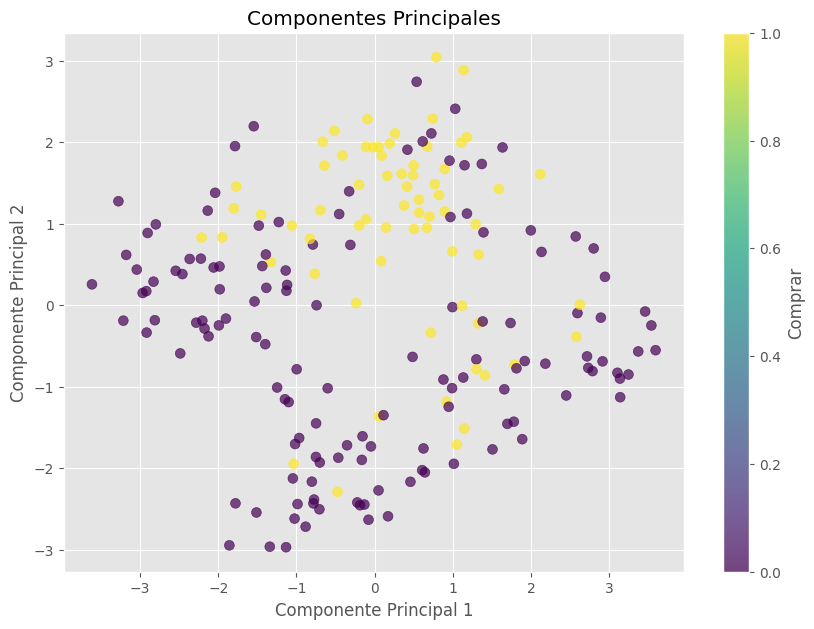

In [50]:
# Graficar en 2D usando los dos primeros componentes principales
Xax = X_pca[:, 0]
Yax = X_pca[:, 1]
labels = datos['comprar'].values

plt.figure(figsize=(10, 7))
scatter = plt.scatter(Xax, Yax, c=labels, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Componentes Principales')
plt.colorbar(scatter, label='Comprar') 
plt.grid(True)
plt.show()

In [46]:
#Instaciamos objeto PCA y aplicamos
pca=PCA(n_components=9) #Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un
pca.fit(X_scaled) #Obtener los componentes principales
X_pca=pca.transform(X_scaled) #Convertimos nuestros datos con las nuevas dimensiones de PCA

print("Porcentaje de varianza por componente", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma', sum(expl[0:5]))

Porcentaje de varianza por componente (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma 0.8524062117714313


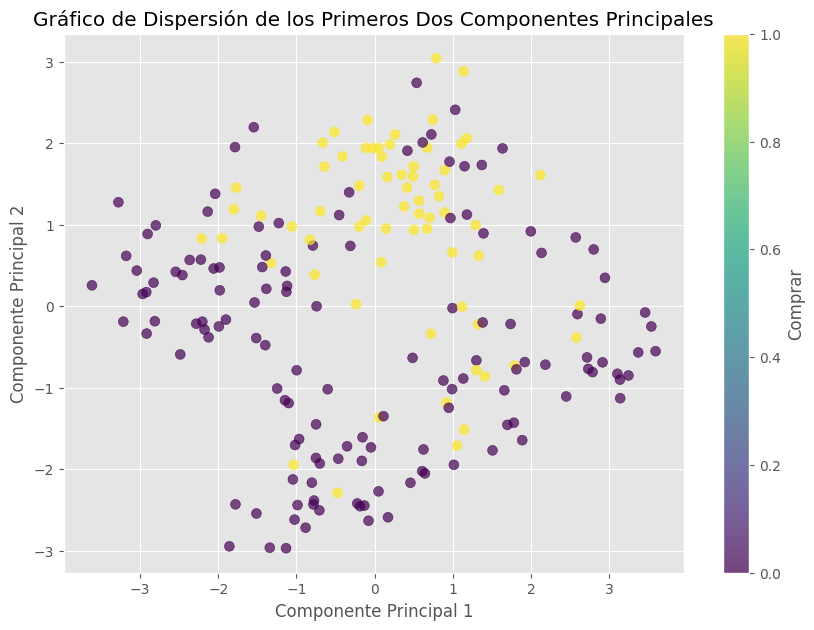